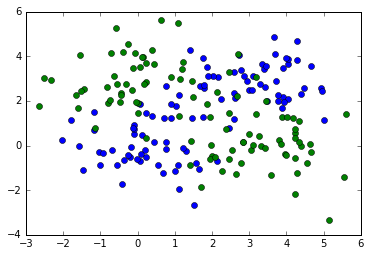

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

N = 50
sigma = 1.2
Sigma = sigma * np.eye(2)
x1, y1 = np.random.multivariate_normal([0, 0], Sigma, N).T
x2, y2 = np.random.multivariate_normal([3, 3], Sigma, N).T
x1 = np.hstack((x1, x2))
y1 = np.hstack((y1, y2))
plt.plot(x1, y1, 'o')
x3, y3 = np.random.multivariate_normal([0, 3], Sigma, N).T
x4, y4 = np.random.multivariate_normal([3, 0], Sigma, N).T
x2 = np.hstack((x3, x4))
y2 = np.hstack((y3, y4))
plt.plot(x2, y2, 'o')

class1 = np.concatenate([x1.reshape(-1, 1), y1.reshape(-1, 1)], axis=1)
class2 = np.concatenate([x2.reshape(-1, 1), y2.reshape(-1, 1)], axis=1)
y = np.ones(4 * N)
y[:2 * N] *= -1
X = np.concatenate((class1, class2))

In [2]:
from rvm import RVM
# Automatically reload imports.
%load_ext autoreload
%autoreload 2

In [3]:
est = RVM(kernel='rbf', n_iter=2000, threshold_alpha=1e14)
est.fit(X, y)

rvm.py:100: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(-X.dot(w))).sum() + 0.5 * (self.alpha_ * w * w).sum()
rvm.py:104: RuntimeWarning: overflow encountered in exp
  num = np.exp(-X.dot(w)) / (1. + np.exp(-X.dot(w)))
rvm.py:104: RuntimeWarning: invalid value encountered in divide
  num = np.exp(-X.dot(w)) / (1. + np.exp(-X.dot(w)))


-73.821483886


In [ ]:
est_slow = RVM(kernel='rbf', n_iter=2000, fast_opt=False)
est_slow.fit(X, y)

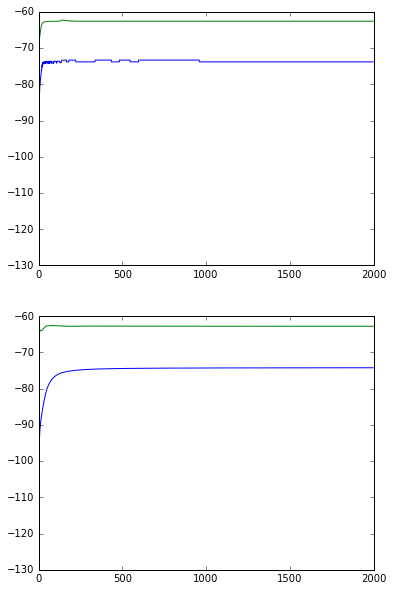

In [19]:
figure, axes = plt.subplots(2, figsize=(6, 10), sharey=True)
figure
axes[0].plot(est.lower_bound)
axes[0].plot(est.upper_bound)
axes[1].plot(est_slow.lower_bound)
axes[1].plot(est_slow.upper_bound)

In [20]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
def visualize(X, y, est):
    plt.clf()
    Z = est.predict(np.c_[xx.ravel(), yy.ravel()]) + 1
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

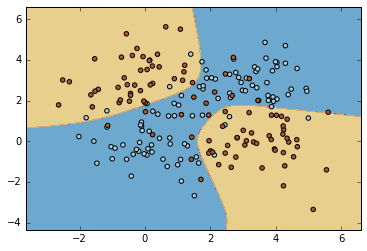

In [21]:
visualize(X, y, est)

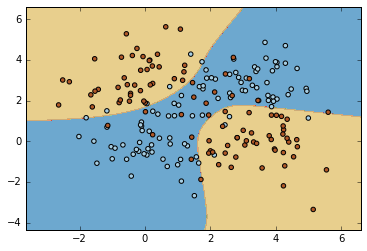

In [22]:
visualize(X, y, est_slow)

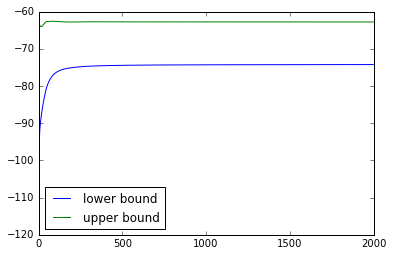

In [9]:
plt.plot(est_slow.lower_bound, label='lower bound')
plt.plot(est_slow.upper_bound, label='upper bound')
plt.legend(loc='best')

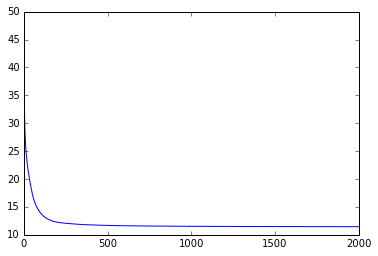

In [10]:
plt.plot(est_slow.upper_bound - est_slow.lower_bound)

In [27]:
print est.mu_
print est_slow.mu_[est.relevance_]

[ -3.48999022 -11.55409059  -9.05709369  -0.30086735  10.48786762
   9.87188166   0.23320107]
[ -1.03690079e-02  -4.17680892e-03  -9.13554705e+00  -9.69335088e-04
   1.04667123e+01   9.50842139e+00   2.76539809e-01]


In [38]:
print est.relevance_
print np.arange(201)[est_slow.alpha_ < 100]

[ 29  42  82  94 105 185 195]
[ 29  42  47  67  82 105 106 109 110 125 140 143 150 176 181 185 195]
